# Workshop Tutorial Example Solutions: Accessing and Plotting Meshes

These are just an example of the many possible solutions to the exercises in [Workshop Tutorial: Accessing and Plotting Meshes](./Tutorial_08_meshes.ipynb)

In [1]:
import phoebe
b = phoebe.default_binary()

**Make a mesh plot (at any single time) to show the limb-darkening across the surface of the star.  Play with changing the underlying limb-darkening model and re-plotting.**

In [2]:
b.add_dataset('lc', compute_times=[0.1])
b.add_dataset('mesh', compute_times=[0.1])

<ParameterSet: 85 parameters | contexts: constraint, compute, figure, dataset>

In [3]:
print(b.get_parameter('columns').choices)

['volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs', 'intensities@lc01', 'normal_intensities@lc01', 'abs_intensities@lc01', 'abs_normal_intensities@lc01', 'boost_factors@lc01', 'ldint@lc01', 'pblum_ext@lc01', 'abs_pblum_ext@lc01', 'ptfarea@lc01']


In [4]:
b.set_value('columns', ['intensities@lc01'])

In [5]:
b.run_compute()

100%|██████████| 1/1 [00:00<00:00,  9.85it/s]


<ParameterSet: 15 parameters | kinds: lc, mesh>

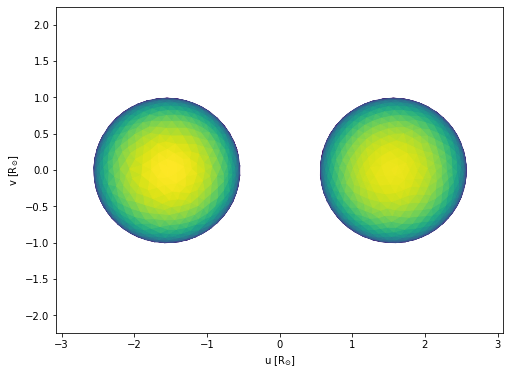

In [6]:
_ = b.plot(kind='mesh', fc='intensities@lc01', ec='face', show=True)

In [7]:
print(b.filter(qualifier='ld_mode'))

ParameterSet: 2 parameters
     ld_mode@primary@lc01@dataset: interp
   ld_mode@secondary@lc01@dataset: interp


In [8]:
b.set_value_all('ld_mode', 'manual')

In [9]:
b.set_value_all('ld_func', 'linear')

In [10]:
b.set_value_all('ld_coeffs', [0.0])

In [11]:
b.run_compute()

100%|██████████| 1/1 [00:00<00:00,  9.67it/s]


<ParameterSet: 15 parameters | kinds: lc, mesh>

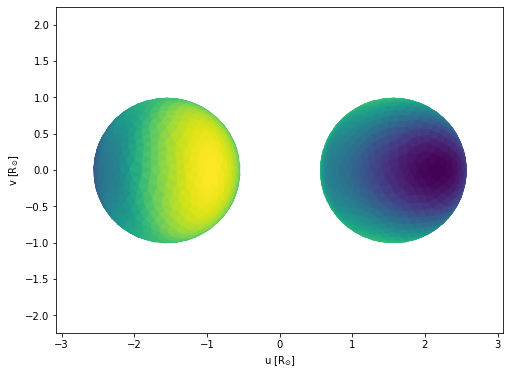

In [12]:
_ = b.plot(kind='mesh', fc='intensities@lc01', ec='face', show=True)

Note that we still have gravity darkening and irradiation affecting the map and that the scale has changed... let's try turning those off.

In [13]:
b.set_value_all('distortion_method', 'sphere')
b.set_value_all('irrad_method', 'none')

In [14]:
b.run_compute()

100%|██████████| 1/1 [00:00<00:00, 96.35it/s]


<ParameterSet: 15 parameters | kinds: lc, mesh>

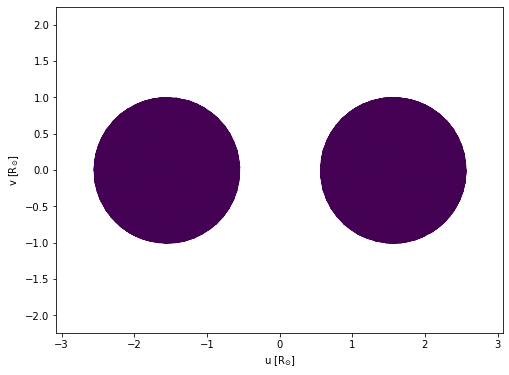

In [15]:
_ = b.plot(kind='mesh', fc='intensities@lc01', ec='face', show=True)

In [16]:
b.set_value_all('ld_mode', 'interp')

In [17]:
b.run_compute()

100%|██████████| 1/1 [00:00<00:00, 82.04it/s]


<ParameterSet: 15 parameters | kinds: lc, mesh>

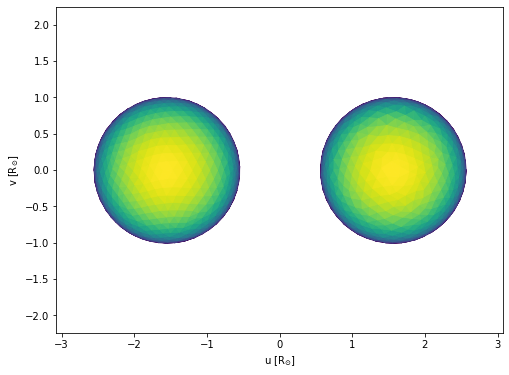

In [18]:
_ = b.plot(kind='mesh', fc='intensities@lc01', ec='face', show=True)

**Try making an animation with the meshes.**

In [19]:
b.set_value('compute_times', kind='mesh', value=phoebe.linspace(0,1,11))

In [20]:
b.run_compute()

100%|██████████| 11/11 [00:00<00:00, 75.63it/s]


<ParameterSet: 115 parameters | kinds: lc, mesh>

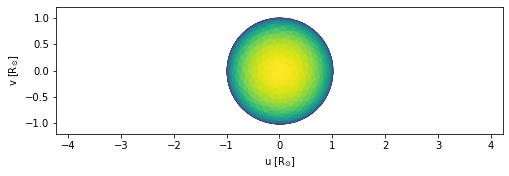

In [25]:
_ = b.plot(kind='mesh', fc='intensities@lc01', ec='face', animate=True, 
          save='Tutorial_05c_solutions.gif', save_kwargs={'writer': 'imagemagick'})

![animation](Tutorial_05c_solutions.gif)